In [1]:
import ROOT

In [2]:
c1 = ROOT.TCanvas()

In [3]:
h1 = ROOT.TH1F("h1","Dimostrazione Binomiale",12,0.,12.) 

In [4]:
h1.SetMarkerStyle(20)

import numpy as np

tr = ROOT.TRandom3()

for imeas in range(500):
    a = np.empty(30)
    tr.RndmArray(30,a)
    rainy_day = [x < 0.16667 for x in a]   
    h1.Fill(rainy_day.count(True)+0.1)
    

In [5]:
h1.Draw()

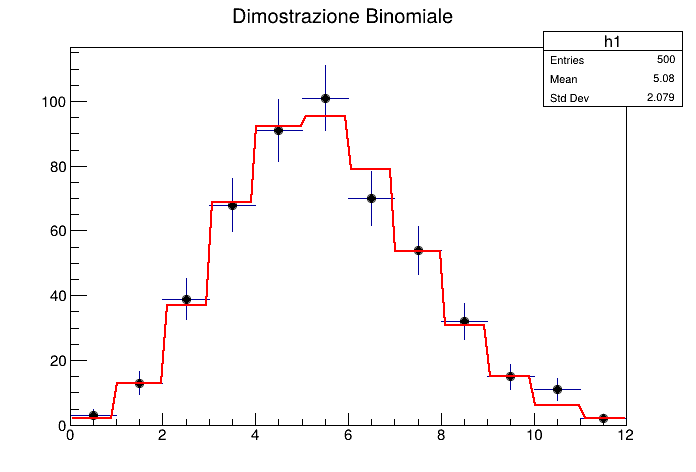

In [6]:
c1.Update()

In [7]:
fPois = ROOT.TF1("fPois","[0]*TMath::Poisson(x,[1])",-10.,20.)
fPois.SetParameters(2000.,3.)
h1.Fit("fPois","S","E1")

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      14.9674
NDf                       =           10
Edm                       =  5.22045e-06
NCalls                    =           68
p0                        =      488.021   +/-   22.1836     
p1                        =        5.513   +/-   0.0918261   


In [8]:
c1.Update()

In [9]:
fPois2 = ROOT.TF1("fPois2","[0]*TMath::PoissonI(x,[1])",-10.,20.)
fPois2.SetParameters(2000.,3.)
h1.Fit("fPois2","S","E1")

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      6.76147
NDf                       =           10
Edm                       =    7.261e-09
NCalls                    =           62
p0                        =      494.926   +/-   22.3107     
p1                        =       4.9967   +/-   0.0933148   


In [10]:
fBino = ROOT.TF1("fBino","[2]*TMath::Binomial([0],int(x))*TMath::Power([1],int(x))*TMath::Power(1-[1],[0]-int(x))",-10.,20.)
fBino.SetParameters(20.,0.5,10000.)
fBino.FixParameter(0,30.)
h1.Fit("fBino","S")

h1.Draw("E")
c1.Update()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      3.96917
NDf                       =           10
Edm                       =  2.63709e-09
NCalls                    =          230
p0                        =           30                      	 (fixed)
p1                        =     0.165775   +/-   0.00323831  
p2                        =      495.993   +/-   22.2931     


In [11]:
bins = [x+0.5 for x in range(13)]
binserr = [0] * 13

In [12]:
entries = [h1.GetBinContent(x) for x in range(1,14)]
errors = [h1.GetBinError(x) for x in range(1,14)]

In [13]:
from array import array

binsa = array('f',bins)
binserra = array('f',binserr)
entriesa = array('f',entries)
errorsa = array('f',errors)

In [14]:
tge = ROOT.TGraphErrors(13,binsa,entriesa,binserra,errorsa)

In [15]:
c3 = ROOT.TCanvas()
tge.Draw("ap")

In [16]:
tge.Fit("fBino","S")

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      4.05344
NDf                       =           11
Edm                       =  1.68282e-08
NCalls                    =           24
p0                        =           30                      	 (fixed)
p1                        =     0.165884   +/-   0.00322316  
p2                        =      496.199   +/-   22.2814     


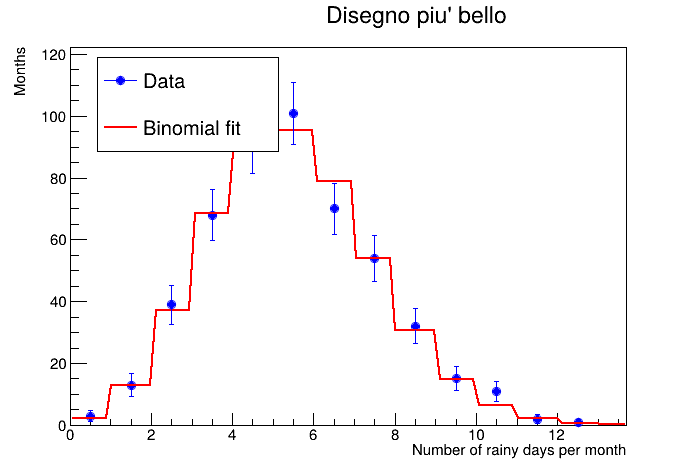

In [17]:
c3.Update()

In [18]:
tge.SetMarkerStyle(20)

In [19]:
tge.SetLineColor(ROOT.kBlue)

In [20]:
tge.SetMarkerColor(ROOT.kBlue)

In [21]:
c3.Update()

In [22]:
tge.SetTitle("Disegno piu' bello")

In [23]:
c3.Update()

In [24]:
tge.GetXaxis().SetTitle("Number of rainy days per month")
tge.GetYaxis().SetTitle("Months")
c3.Update()

In [25]:
l = ROOT.TLegend(0.14,0.68,0.4,0.88)

In [26]:
l.AddEntry(tge,"Data","lp")
l.AddEntry(fBino,"Binomial fit","l")
l.SetFillColor(ROOT.kWhite)
l.Draw('same')

In [27]:
c3.Update()